
# Programming for data analytics:


## 1) Data processing

#### 1.1 Download the dataset for the period 2009 – 2018 and create a dataframe that concatenates Wales (total) employment value only


<blockquote>
<p><span style="color:red">References</span></p>

[1] [iloc in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
    
    
[2] [Numpy](https://numpy.org/)

In [1]:
## importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# Cleaning 2009 year dataset
df2009 = pd.read_csv("2009.csv")
df2009_1 = df2009.iloc[1:,1:]

#cleaning 2010 year dataset
df2010 = pd.read_csv("2010.csv")
df2010_1 = df2010.iloc[1:,1:]

#cleaning 2011 year dataset
df2011 = pd.read_csv("2011.csv")
df2011_1 = df2011.iloc[1:,1:]

#cleaning 2012 dataset
df2012 = pd.read_csv("2012.csv")
df2012_1 = df2012.iloc[1:,1:]

#cleaning 2013 dataset
df2013 = pd.read_csv("2013.csv")
df2013_1 = df2013.iloc[1:,1:]

#cleaning 2014 dataset
df2014 = pd.read_csv("2014.csv")
df2014_1 = df2014.iloc[1:,1:]

#cleaning 2015 dataset
df2015 = pd.read_csv("2015.csv")
df2015_1 = df2015.iloc[1:,1:]

#cleaning 2016 dataset
df2016 = pd.read_csv("2016.csv")
df2016_1 = df2016.iloc[1:,1:]

#cleaning 2017 dataset
df2017 = pd.read_csv("2017.csv")
df2017_1 = df2017.iloc[1:,1:]

#cleaning 2018 dataset
df2018 = pd.read_csv("2018.csv")
df2018_1 = df2018.iloc[1:,1:]


<blockquote>
<p><span style="color:red">References:</span></p>

[CONCAT in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [3]:
# concating all the cleaned datasets

df= pd.concat([df2009_1, df2010_1 ,df2011_1, df2012_1 ,df2013_1, df2014_1 ,df2015_1, df2016_1,df2017_1, df2018_1 ], ignore_index = True, axis = 1)
final_df=df.drop(columns = [2,4,6,8,10,12,14,16,18],axis = 1)
final_df.rename(columns={0:'Industry',1:'2009',3:'2010', 5:'2011',7:'2012',9:'2013',11:'2014',13:'2015',15:'2016',17:'2017',19:'2018'}, inplace=True)
final_df
final_dfs = final_df
final_dfs

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


### 1.2. Check for any null value or outlier. If found replace that with mean value.


In [4]:
#checking null values

final_df.isnull().values.any()

False

- An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.”  

<blockquote>
<p><span style="color:red">References:</span></p>
    
[CONCAT in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
Hawkins, D.M., 1980. [Identification of outliers](https://link.springer.com/book/10.1007%2F978-94-015-3994-4) ((Vol. 11). London: Chapman and Hall.


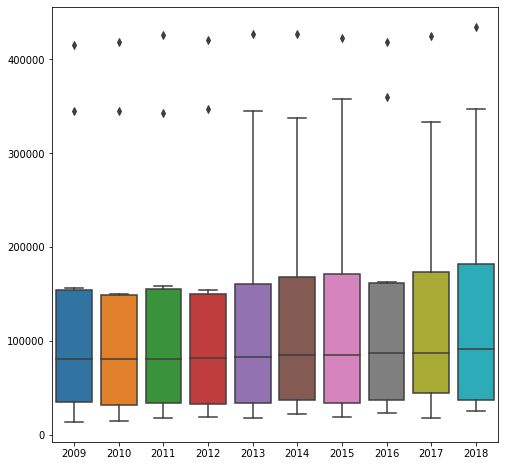

In [5]:
#Check for outliers in data using boxplot
sns.boxplot(data=final_df[['2009','2010','2011','2012','2013',"2014","2015","2016","2017","2018"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [6]:
# calculating the mean vlaues 
mean=final_df.mean()
mean

2009    133610.0
2010    133040.0
2011    134660.0
2012    133730.0
2013    136510.0
2014    139440.0
2015    140380.0
2016    140880.0
2017    142290.0
2018    145220.0
dtype: float64

In [7]:
#Replacing nan with mean value
exp_df=final_df.fillna(mean)
exp_df1 = exp_df
exp_df1

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


### 1.3.Change the name of the industries as below

In [8]:
#Changing the Industry column names with desired names

exp_df["Industry"]= exp_df["Industry"].replace({'Agriculture, forestry and fishing ': 'Agriculture' , 'Wholesale, retail, transport, hotels and food ': 'Retail',
                                               'Information and communication ': 'ICT', 'Finance and insurance activities ': 'Finance','Real estate activities ': 'Real_Estate',
                                               'Public administration, defence, education and health ': 'Public_Adminstration', 'Other service activities ': 'Other_Service',
                                               'Professional, scientific and technical activities; administrative and support service activities ' : 'Professional_Service',
                                               'administrative and support service activities ': 'Professional_Service'})
df1 = exp_df
df1

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


## 2. Data Analysis

#### 2.1.    Which industry employed highest and lowest workers over the period?

<blockquote>
<p><span style="color:red">References</span></p>

Tuffery [Datamining and Data analysis ](https://books.google.it/books?hl=en&lr=&id=5MTBlxZUKiIC&oi=fnd&pg=PR17&dq=Stephane+Tuffery,+Data+mining+and+statistics+for+decision+making,+Wiley+Series+in+Computational+Statistics,+2011&ots=cf5ilUaH5x&sig=ePp_TYmeE42qdMnqa6v8a2TIgYQ&redir_esc=y#v=onepage&q=Stephane%20Tuffery%2C%20Data%20mining%20and%20statistics%20for%20decision%20making%2C%20Wiley%20Series%20in%20Computational%20Statistics%2C%202011&f=false) 2011. Data mining and statistics for decision making. John Wiley & Sons.

In [9]:
# Calulating the sum of employess for the all the years for each industry
exp_df['hlsum'] = exp_df.sum(axis = 1) 
exp_df

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,hlsum
1,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100,392800
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700,1622600
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800,945300
4,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600,3461700
5,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500,320700
6,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500,322100
7,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200,189900
8,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100,1565200
9,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900,4236500
10,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800,740800


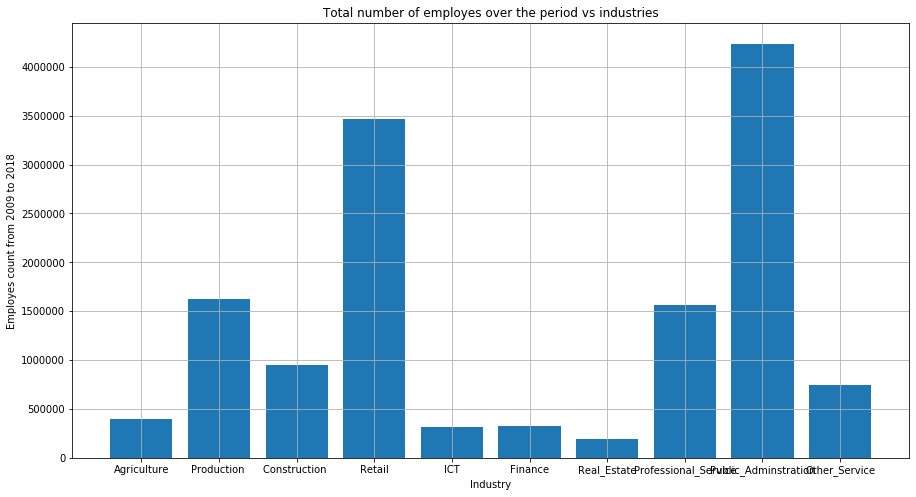

In [45]:
# ploting the graph for total employees for each industry over the period
plt.bar(x = exp_df['Industry'], height= exp_df['hlsum'])
plt.rcParams['figure.figsize'] = [12,8]
plt.title('Total number of employes over the period vs industries')
plt.xlabel('Industry')
plt.ylabel('Employes count from 2009 to 2018')
plt.grid(True)


- From the above bar chart we can interpret that Public_Adminstration industry has higest number of workes and where as Real_Estate industry has lowest workers over the period of 2009 to 2018.

- public_Adminstration  = 4236500.0
- Real_Estate           = 189900.0

### 2.2 	Which industry has the highest and lowest overall growth over the period? 

In [11]:
# calculating the percentage change for each year and calculating the total percentage over the period
pergrowth_df = exp_df.drop(columns = ['hlsum'], axis = 1).copy()
pctchange = pergrowth_df.iloc[:, 1:].pct_change(axis =1)
pctchange['Industry'] = pd.Series(pergrowth_df['Industry'])
pctchange['%growth'] = (pctchange.drop('Industry', axis=1).sum(axis=1))* 100
pctchange

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Industry,%growth
1,NaN,0.013263,-0.054974,0.000000,0.019391,0.160326,-0.046838,0.061425,-0.069444,0.022388,Agriculture,10.553572
2,NaN,-0.044033,0.058745,-0.026482,0.063472,0.055420,-0.005770,-0.056878,0.016000,0.003634,Production,6.410810
3,NaN,-0.035197,-0.034335,0.014444,-0.021906,0.086226,-0.045361,0.109071,-0.115871,0.121145,Construction,7.821775
4,NaN,-0.002606,-0.004064,0.012241,-0.006335,-0.022602,0.060480,0.006989,-0.074125,0.042279,Retail,1.225782
5,NaN,0.003597,-0.053763,0.030303,-0.011029,0.327138,-0.327731,0.433333,0.712209,-0.465195,ICT,64.886114
6,NaN,-0.118343,0.114094,-0.063253,0.041801,0.000000,-0.049383,0.006494,0.035484,0.105919,Finance,7.281206
7,NaN,0.081481,0.205479,0.068182,-0.042553,0.233333,-0.139640,0.188482,-0.198238,0.384615,Real_Estate,78.114243
8,NaN,0.006906,-0.015089,-0.043872,0.091770,0.020013,0.086985,-0.030084,0.094293,0.060658,Professional_Service,27.157936
9,NaN,0.007218,0.016722,-0.010808,0.014252,0.001405,-0.010290,-0.011106,0.014337,0.024499,Public_Adminstration,4.623003
10,NaN,0.059190,0.064706,0.005525,0.037088,-0.029139,0.053206,-0.062176,0.149171,-0.016827,Other_Service,26.074380


Text(0.5, 1.0, 'Percentage growth of industries over the period')

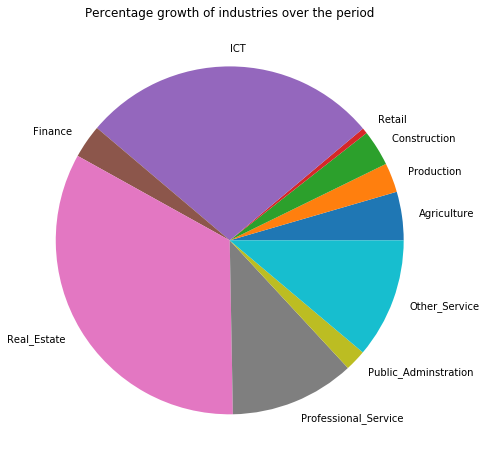

In [46]:
plt.rcParams['figure.figsize'] = [12,8]
plt.pie(x = pctchange['%growth'], labels= exp_df['Industry'])
plt.title("Percentage growth of industries over the period")

-  Above visible plot shows the overall growth of each industry over the ten year time period. Hence from the plot we can demonstarte that Real_Estate has the highest growth where as Retail has the lowest growth over the period.
- Real_Estate growth  = 78.1142 %
- Retail              = 1.2 %

### 2.3.Which years are the best and worst performing year in relation to number of employment. (highest and                    lowest employment) 

In [13]:
#calculaating the year wise total employee count

bywy = exp_df1.drop(['Industry','hlsum'],axis =1).sum(axis = 0)
bywy

2009    1336100
2010    1330400
2011    1346600
2012    1337300
2013    1365100
2014    1394400
2015    1403800
2016    1408800
2017    1422900
2018    1452200
dtype: int64

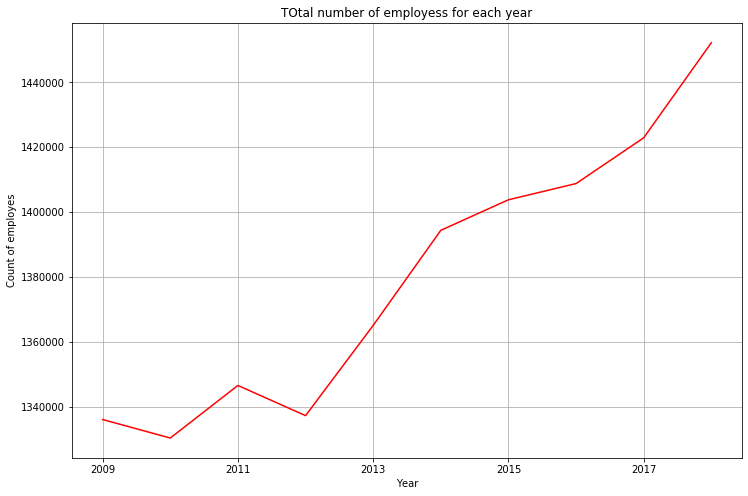

In [47]:
plt.rcParams['figure.figsize'] = [12,8]
bywy.plot(kind='line',color='red')
plt.xlabel("Year")
plt.ylabel("Count of employes")
plt.title("TOtal number of employess for each year")
plt.grid(True)


- The above line graph indicates the employment count per year by taking all indutries into consideration. From the plot we can determine that year 2018 is the best performing year in relation to number of employment which stands at 1452200.0 where as 2010 is the worst performing year which stands at 1330400.0

- Best performing year(2018) - 1452200.0
- Worst performing year(2010) - 1330400.0

## 3. Visual analysis:

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites


<blockquote>
<p><span style="color:red">References</span></p>

[Plotly Express in Python](https://plotly.com/python/plotly-express/)

[Pands Melt Function](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)


In [48]:
#Note - The graph for this is visible unless we ran the code because of high resolution of this plot

import plotly.express as px
plt.rcParams['figure.figsize'] = [10,25]
df_visual = exp_df.drop(columns = 'hlsum')
df_visual['Industry'] = df_visual.Industry
df_visual = pd.melt(df_visual, id_vars = ['Industry'])
df_visual.columns = ['Industry', 'Year', 'Employment']
fig3 = px.scatter(df_visual, x = 'Industry', y = 'Employment', animation_frame="Year", color = 'Industry',  
                  animation_group="Industry", size = 'Employment',size_max=80)
fig3.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="white")
fig3.show()


## 4.	PCA/Correlation 

#### 4.1.	Undertake a PCA (PC=2; columns should be like PC1, PC2, Industry) and produce a scatter plot.  Write your interpretation about the plot and in relation to the analysis of section 2 & 3 (for example which industries are correlated over the years as well as in PCA etc.)


Principal Component Analysis (PCA) is a dimensionality-reduction technique that is often used to transform a high-dimensional dataset into a smaller-dimensional subspace prior to running a machine learning algorithm on the data.

<blockquote>
<p><span style="color:red">References</span></p>

Wold, Svante,[Principal component analysis](https://www.sciencedirect.com/science/article/abs/pii/0169743987800849) Kim Esbensen, and Paul Geladi. "Principal component analysis." Chemometrics and intelligent laboratory systems 2.1-3 (1987): 37-52.

In [16]:
exp_df.columns

Index(['Industry', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'hlsum'],
      dtype='object')

In [17]:
pca_data=exp_df.drop("Industry",axis=1)

In [18]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pca_data)
PCA_components = pd.DataFrame(data = principalComponents,columns = ['PC1', 'PC2'])
PCA_components.index += 1
PCA_components['Industry'] = exp_df1['Industry']
PCA_components


,PC1,PC2,Industry
1,-1.035128e+06,-8150.175903,Agriculture
2,2.547009e+05,912.090422,Production
3,-4.556565e+05,-8786.485643,Construction
4,2.183607e+06,-15875.620328,Retail
5,-1.110841e+06,10286.599883,ICT
6,-1.109275e+06,-10292.744210,Finance
7,-1.247917e+06,-7408.952446,Real_Estate
8,1.944876e+05,33478.821294,Professional_Service
9,2.996166e+06,2770.445986,Public_Adminstration
10,-6.701449e+05,3066.020945,Other_Service


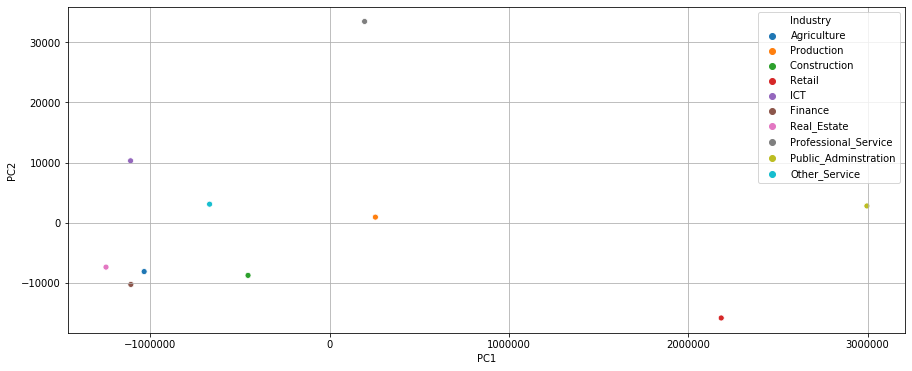

In [19]:
plt.rcParams['figure.figsize'] = [15,6]
sns.scatterplot(x = PCA_components['PC1'], y = PCA_components['PC2'],hue=PCA_components.Industry)
plt.grid(True)

#### Analysis:

In above code principal component analysis does just what it advertises the principal components of the dataset.It transformed the data into a lower-dimensional subspace into a new coordinate system named as ( PC1, PC2). In the new coordinate system, the first axis corresponds to the first principal component, which is the component that explains the greatest amount of the variance in the data [0.999908]. When plotted a scatter plot the analysis shows similar interpretation like above for example industries like Public administration has largest number of employes and Industries like Real estate and Finance and other services are clustered together which likely has same information

- By looking at above PCA graph we can assume that this data may have 3 clusters. 

### 4.2. Make a year wise correlation for each industry.  Does the aforementioned industries are also correlated over the years? Explain your answer. 

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".


<blockquote>
<p><span style="color:red">References</span></p>

M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)

Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy." Computer and Information Sciences.

In [20]:
corr_1=exp_df.drop(["hlsum"],axis=1)
pearsoncorr = corr_1.corr(method='pearson')
pearsoncorr

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2009,1.000000,0.999727,0.999414,0.999368,0.999193,0.998697,0.998396,0.999272,0.994614,0.996296
2010,0.999727,1.000000,0.999572,0.999578,0.999329,0.998561,0.998301,0.999244,0.995403,0.996858
2011,0.999414,0.999572,1.000000,0.999740,0.999859,0.999218,0.998314,0.998368,0.995285,0.996524
2012,0.999368,0.999578,0.999740,1.000000,0.999387,0.998415,0.997753,0.998475,0.993935,0.995168
2013,0.999193,0.999329,0.999859,0.999387,1.000000,0.999440,0.998973,0.998499,0.996068,0.997286
2014,0.998697,0.998561,0.999218,0.998415,0.999440,1.000000,0.998214,0.997781,0.996494,0.996945
2015,0.998396,0.998301,0.998314,0.997753,0.998973,0.998214,1.000000,0.999051,0.995520,0.998101
2016,0.999272,0.999244,0.998368,0.998475,0.998499,0.997781,0.999051,1.000000,0.995094,0.997167
2017,0.994614,0.995403,0.995285,0.993935,0.996068,0.996494,0.995520,0.995094,1.000000,0.997204
2018,0.996296,0.996858,0.996524,0.995168,0.997286,0.996945,0.998101,0.997167,0.997204,1.000000


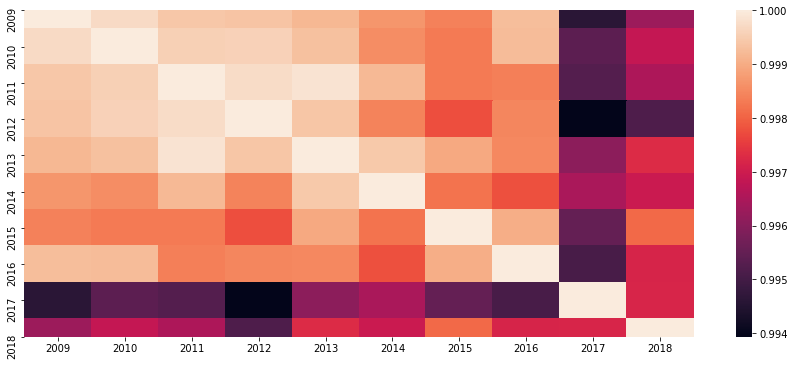

In [21]:
sns.heatmap(pearsoncorr)

##### Analysis:

In this case, the person correlation coefficient technique is implemented in order to evaluate the direction of correlation ( whether positive or negative) between the two variables and  here the coefficient typically defined by ρ which assumes only values between-1 and 1. In this portion,the year wise correlation was calculated on the basis of values from 2009 to 2018, the correlation was calculated and the magnitude of the correlation was determined.

Interpreting the value of ρ

- 0.9 to 1 positive or negative indicates a very strong correlation.
- 0.7 to 0.9 positive or negative indicates a strong correlation.

Correlation co-efficient close to 1 means that there’s a very strong positive correlation between the variables. 


## 5) Clustering (k means & hierarchical)

#### 5.1.	Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.  Write your own interpretation (~100 words).


- clustering can be considered the most important unsupervised learning problem it deals with finding a structure in a collection of unlabeled data.

- clustering could be the process of organizing objects into groups whose members are similar in some way





<blockquote>
<p><span style="color:red">References</span></p>

[Scikit-learn learning for clustering](https://scikit-learn.org/stable/install.html)




In [22]:
years_to_select =["2010","2018"]
data=exp_df1[years_to_select]
cluster_data=data.rename(columns={'2010':'Worst_year','2018':'best_year'})
cluster_data

,Worst_year,best_year
1,38200,41100
2,149800,165700
3,93200,101800
4,344500,347600
5,27900,31500
6,29800,35500
7,14600,25200
8,145800,187100
9,418600,434900
10,68000,81800


#### Scaling data
The magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of setting the magnitude of the variables to the same range of values.


#### Normalisation

In [23]:
## Importing libraries
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(cluster_data)
to_cluster = scaler.transform(cluster_data)
to_cluster

array([[0.05841584, 0.03880888],
       [0.33465347, 0.34293385],
       [0.19455446, 0.18696607],
       [0.81658416, 0.78691726],
       [0.03292079, 0.01537711],
       [0.03762376, 0.02514035],
       [0.        , 0.        ],
       [0.32475248, 0.3951672 ],
       [1.        , 1.        ],
       [0.13217822, 0.13814987]])

In [24]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('mean:',to_cluster.mean(axis=0))
print('std:', to_cluster.std(axis=0))

# let's look at the new minimum and maximum values
print('Min values:', to_cluster.min(axis=0))
print('Max values:', to_cluster.max(axis=0))

mean: [0.29316832 0.29294606]
std: [0.32954885 0.33033951]
Min values: [0. 0.]
Max values: [1. 1.]


After MinMaxScaling, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.But the minimum and maximum values are standarised across variables, different from what occurs with standarisation.

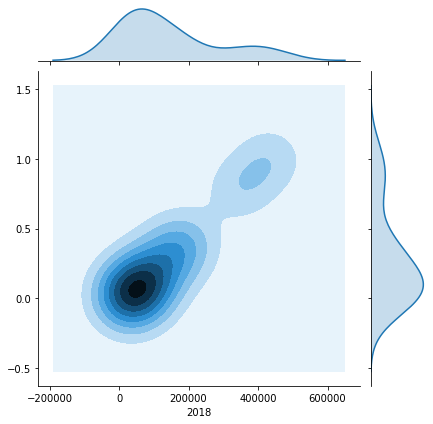

In [25]:
# let's look at how transformed best performece year looks like compared to the original variable (2018)
sns.jointplot(exp_df1["2018"], to_cluster[:,1], kind='kde')

As we can see from the above plot, MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.

### Kmeans

The _k-means algorithm_ is an example of an expectation maximization algorithm.
Such algorithms generally have a form in which we need to find some parameters,
but in order to find those parameters, we need to know some other values that
we can't observe directly.


<blockquote>
<p><span style="color:Blue">References</span></p>

Xu, R. and Wunsch, D.[Clustering Techniques](https://books.google.it/books?hl=en&lr=&id=kYC3YCyl_tkC&oi=fnd&pg=PR5&dq=clustering&ots=qje1AA8f0A&sig=MCvgLqBN9Wy9vNg4WSJijBEF68o&redir_esc=y#v=onepage&q=clustering&f=false) 2008. Clustering (Vol. 10). John Wiley & Sons.

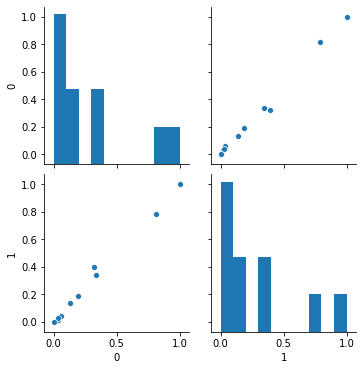

In [26]:
sns.pairplot(pd.DataFrame(to_cluster))

#### Observe the pairplots
In this simple example you can easily see from the pairplots that the two most interesting columns are `0` and `1`.

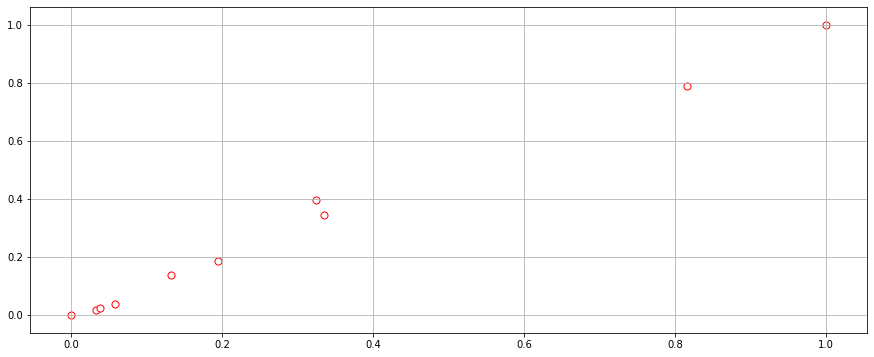

In [27]:
focus = [0,1] # storing here the interesting columns will make easier to try
              # with other columns
plt.scatter(to_cluster[:,focus[0]], to_cluster[:,focus[1]], c='white',edgecolors='red',marker='o' ,s=50)              
plt.grid()                       
plt.show()

In [28]:
def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10,points_color = cm.tab10(10)):

    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]], 
                    X[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], 
                points[:,dim[1]], 
                s=50, 
                marker='*', 
                c=[points_color], 
                label=points_name)
    plt.legend()
    plt.grid()
    plt.show()   

####  Elbow method 

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. The below diagram shows how the elbow method works:-

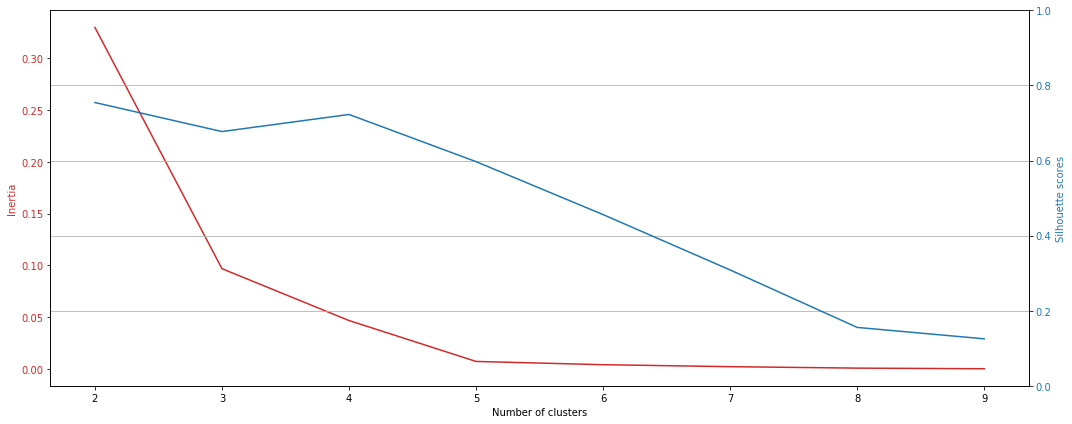

In [29]:
k_range = range(2,10)
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    y_km = km.fit_predict(to_cluster)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(to_cluster,y_km))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]
plt.grid(True)
fig.tight_layout() 
plt.show()

In [30]:
distortions

[0.32978485837671684,
 0.09671494152469647,
 0.046628393239139365,
 0.007105579984598559,
 0.0039686714425583944,
 0.0020583838271917318,
 0.0006452080441935931,
 5.8719406087057025e-05]

In [31]:
silhouette_scores

[0.754602956292608,
 0.6772479402646634,
 0.7227856620628639,
 0.5971096635768023,
 0.4560283499533311,
 0.308534006772258,
 0.15554199909199812,
 0.125151716911917]

### K-Means model with two clusters

In [32]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(to_cluster)
km.cluster_centers_

array([[0.13938738, 0.14281792],
       [0.90829208, 0.89345863]])

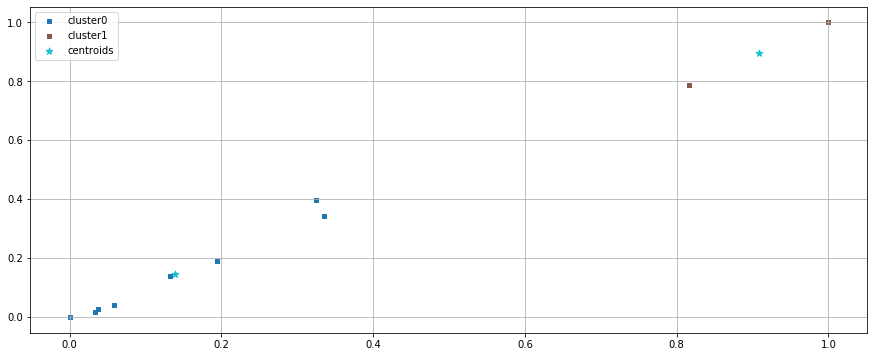

In [33]:
from plot_clusters import plot_clusters
plot_clusters(to_cluster,y_km, dim=(focus[0],focus[1]),points = km.cluster_centers_)

In [34]:

print('Distortion: %.2f' % km.inertia_)

Distortion: 0.33


### K-Means model with three clusters

In [35]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(to_cluster)
km.cluster_centers_

array([[0.07594884, 0.06740705],
       [0.90829208, 0.89345863],
       [0.32970297, 0.36905052]])

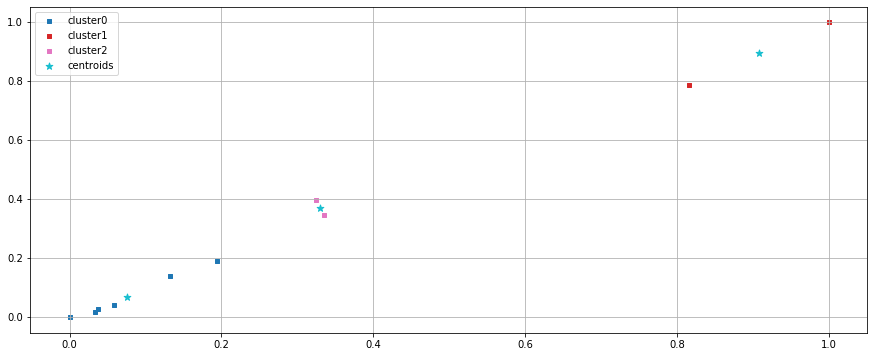

In [36]:
from plot_clusters import plot_clusters
plot_clusters(to_cluster,y_km, dim=(focus[0],focus[1]),points = km.cluster_centers_)

In [37]:

print('Distortion: %.2f' % km.inertia_)

Distortion: 0.10


#### Solution:

The purpose of clustering is therefore to evaluate the inherent grouping in the set of unmarked data. It can be seen that there is no absolute best criterion regardless of the final goal of clustering. The scaling technique (MinMaxScaler) was applied. Both inliers within the narrow range [0, 0.01] have been compressed to restrict the distribution of the variable and are thus most likely to be affect the predictive capacity of this function.

We can see that, as the number of clusters increases , the average distortion decreases For example for K=2 the (Distortion: 0.33) and for K=3 (Distortion: 0.10,) Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids and Improvements in average distortion will, however, decline as k increases. The value of the number of clusters at which the change of the distortion decreases most is called the elbow at which we are located.

When I plotted the scatter plot with K=2 and K=3 with cluster centers the Industries which are very less performed in 2 and 3 section formed one cluster and other Industires  formed sepearete cluster with their centroids.

### Dendogram

<blockquote>
<p><span style="color:red">References</span></p>


[1] Thirathon, N., 2004.[ Heirachial Clustering techniques](https://dspace.mit.edu/handle/1721.1/17981) Cyclic exchange neighborhood search technique for the K-means clustering problem (Doctoral dissertation, Massachusetts Institute of Technology).

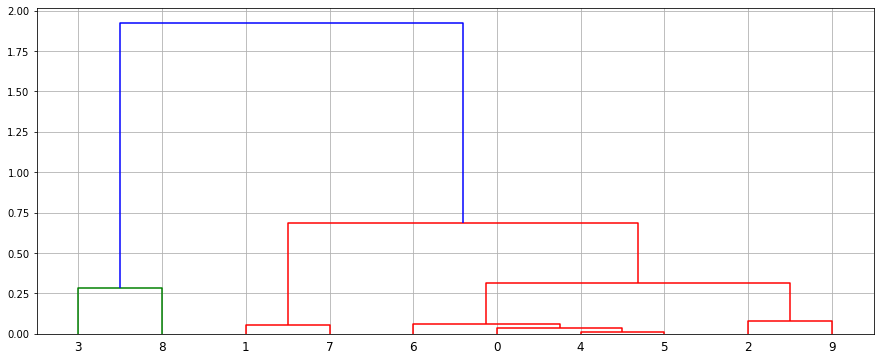

In [38]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(to_cluster))
plt.grid(True)
plt.show()

We can see the values of 0s and 1s and 2s in the output since we defined 3 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hei=cluster.fit_predict(to_cluster)
hei

array([0, 2, 0, 1, 0, 0, 0, 2, 1, 0], dtype=int64)

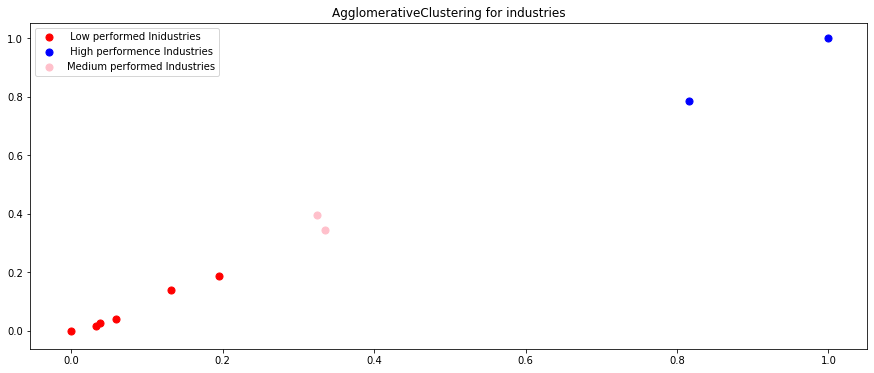

In [40]:
plt.title('AgglomerativeClustering for industries')
# Visualising the clusters
plt.scatter(to_cluster[hei == 0, 0], to_cluster[hei == 0, 1], s = 50, c = 'red', label = ' Low performed Inidustries')
plt.scatter(to_cluster[hei == 1, 0], to_cluster[hei == 1, 1], s = 50, c = 'blue', label = ' High performence Industries')
plt.scatter(to_cluster[hei == 2, 0], to_cluster[hei == 2, 1], s = 50, c = 'pink', label = 'Medium performed Industries')
plt.legend()
plt.show()


**Analysis**:


In this section we analyzed a Hierarchical cluster analysis which is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

Here dendograms shows the 

1. distance between data points represents dissimilarities.
2. Height of the blocks represents the distance between clusters.

The scatter diagram was plotted with (n clusters=3) and based on the graph I found that the result was pretty similar to the kmeans.

# Discussion

Downloaded the datasets from  Employment of Wales(Total) against year 2009-2018 and later loaded the data using pandas techniques and concated all as wales total employment only and checked for missing values In our final dataset and Then filled all NaN value with mean value. Then I have started data analysis on the data set after creating dataframe. 

Analysis:

Started the analysis by finding the highest and lowest workers industry compared to the period 2009 to 2018 and the final result is Public Administration is the highest worker industry and Real Estate as the lowest worker industry and when dealing with the growth of industries over the period I started the analysis by measuring data, which has more percent change of employees as the highest growing industry which results ICT and analyzied for the best and worst years against employability. In this analysis, I have seen 2010 has a lowest rate and 2018 has a highest  rate against its employability count.

- Principal component analysis technique is applied and reduced dimensions of the dataset to two and named as (PC1,PC2) and analyzed relation by plotting a scatter plot and found that three clusters might be formed and industries which has similar range performece formed one cluster and Industries like ICT which is far in analysis has formed other cluster 

- Person correlation coeffeicent is applied in order to find the correlated year with respect to industries and found that Correlation co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. 

- To perform clustering intially I scaled down the data using normalization technique is utilised to bring all the variables to a more homogeneous scale and it is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero) and perfomed elbow method and found that Kvalues as (2 and 3).

- By taking K=2,3 Fitted the Kmeans with respect to cluster centers and here algorithm groups similar objects into groups called clusters and the endpoint is a set of clusters or groups, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

- Dendogram is plotted to indentify similar sets of data and fitted the AgglomerativeClustering with 3 clusters and scatter diagram is plotted with respect to industires poerformece




**References**:

Idris, Ivan, [Python Data Analysis Cookbook](https://www.oreilly.com/library/view/python-data-analysis/9781785282287/) Python Data Analysis CookbookIdris, Ivan. Python Data Analysis Cookbook. Packt Publishing Ltd, 2016


[2] Wold, Svante,[Principal component analysis](https://www.sciencedirect.com/science/article/abs/pii/0169743987800849) Kim Esbensen, and Paul Geladi. "Principal component analysis." Chemometrics and intelligent laboratory systems 2.1-3 (1987): 37-52.

[3] M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)
Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy." Computer and Information Sciences.

[4] [Plotly Express in Python](https://plotly.com/python/plotly-express/)

[5] [Pands Melt Function](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

[6] [iloc in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

[7] [CONCAT in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

[8] Tufféry [Datamining and Data analysis ](https://books.google.it/books?hl=en&lr=&id=5MTBlxZUKiIC&oi=fnd&pg=PR17&dq=Stephane+Tuffery,+Data+mining+and+statistics+for+decision+making,+Wiley+Series+in+Computational+Statistics,+2011&ots=cf5ilUaH5x&sig=ePp_TYmeE42qdMnqa6v8a2TIgYQ&redir_esc=y#v=onepage&q=Stephane%20Tuffery%2C%20Data%20mining%20and%20statistics%20for%20decision%20making%2C%20Wiley%20Series%20in%20Computational%20Statistics%2C%202011&f=false) 2011. Data mining and statistics for decision making. John Wiley & Sons.

[9] Xu, R. and Wunsch, D.[Clustering Techniques](https://books.google.it/books?hl=en&lr=&id=kYC3YCyl_tkC&oi=fnd&pg=PR5&dq=clustering&ots=qje1AA8f0A&sig=MCvgLqBN9Wy9vNg4WSJijBEF68o&redir_esc=y#v=onepage&q=clustering&f=false) 2008. Clustering (Vol. 10). John Wiley & Sons.

[10] Thirathon, N., 2004.[ Heirachial Clustering techniques](https://dspace.mit.edu/handle/1721.1/17981) Cyclic exchange neighborhood search technique for the K-means clustering problem (Doctoral dissertation, Massachusetts Institute of Technology).

[11] [CONCAT in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
Hawkins, D.M., 1980. [Identification of outliers](https://link.springer.com/book/10.1007%2F978-94-015-3994-4) ((Vol. 11). London: Chapman and Hall.